In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [3]:
#Loding dataset
data=pd.read_csv("C:/Users/NAMRATA/Downloads/wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
#Droping type column
wine=data.drop('Type',axis=1)
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
w_norm=norm_func(wine)
w_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


PCA

In [8]:
#performing PCA with 3 principal components
pca=PCA(3)
pca_values=pca.fit_transform(w_norm)
pca_values

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

In [9]:
var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671])

In [10]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([40.75, 59.72, 68.28])

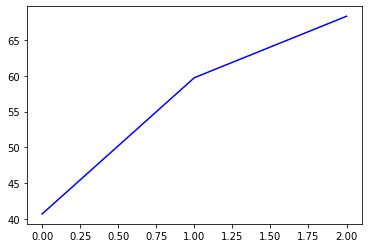

In [11]:
plt.plot(var1,color="blue")

In [12]:
pca_values

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

#converting the PCA values to dataframe

In [13]:
pca_df=pd.DataFrame(pca_values,columns=['PC1','PC2','PC3'])
pca_df

,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


checking weather the pca values give same no.of clusters by k means and Hierarchical clustering

In [ ]:
 Hierarchical clustering


In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

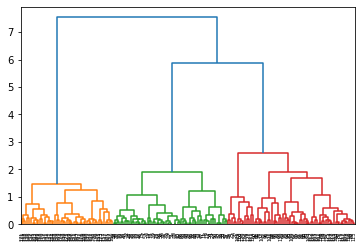

In [15]:
dendrogram=sch.dendrogram(sch.linkage(pca_values,method='ward'))

Here we can see the our pca_values are clearly divided into 3 clusters same as the our default data is also divided into 3 types

In [17]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(pca_values)
y_hc

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [18]:
pca_df['h_clusterid']=hc.labels_

k means clustering

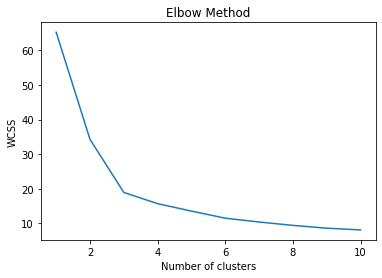

In [30]:
wcss= []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_values)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

1)from above Elbow diagram we can see the curve has steep bend at 3,so we can consider that optimum clusters as3
2)so by k means also we got as 3 clusters as default data</b>

In [31]:
from sklearn.cluster import KMeans
clusters_new=KMeans(3,random_state=42)
clusters_new.fit(pca_values)

KMeans(n_clusters=3, random_state=42)

In [32]:
clusters_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [33]:
pca_df['kmeans_cluster']=clusters_new.labels_

In [34]:
pca_df['type']=data.iloc[:,0]

In [35]:
pca_df

,PC1,PC2,PC3,h_clusterid,kmeans_cluster,type
0,-0.706336,-0.253193,0.024093,2,0,1
1,-0.484977,-0.008823,-0.280482,2,0,1
2,-0.521172,-0.189187,0.196217,2,0,1
3,-0.821644,-0.580906,0.081110,2,0,1
4,-0.202546,-0.059467,0.300240,0,0,1
...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,1,1,3
174,0.581781,-0.348366,0.083590,1,1,3
175,0.626313,-0.546857,-0.030495,1,1,3
176,0.572991,-0.425516,-0.094537,1,1,3


#classification of principal componenets with different clusters

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

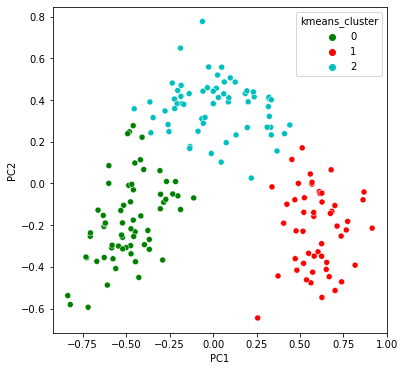

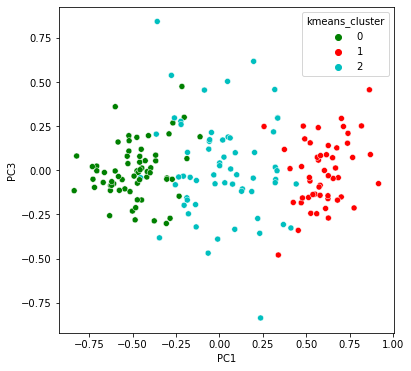

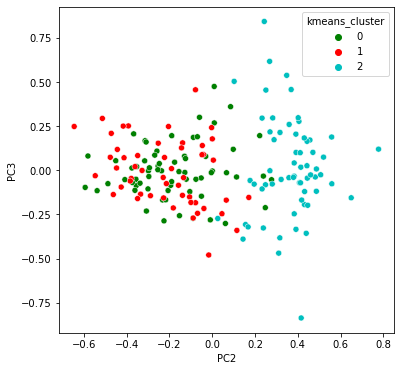

In [37]:
import seaborn as sns
plt.figure(figsize =(6, 6)) 
sns.scatterplot(data=pca_df,x='PC1',y='PC2',hue='kmeans_cluster',palette=['g', 'r','c'])
plt.figure(figsize =(6, 6)) 
sns.scatterplot(data=pca_df,x='PC1',y='PC3',hue='kmeans_cluster',palette=['g', 'r','c'])
plt.figure(figsize =(6, 6)) 
sns.scatterplot(data=pca_df,x='PC2',y='PC3',hue='kmeans_cluster',palette=['g', 'r','c'])